# Imports

In [131]:
# Bibliotheken für Datenmanipulation
import pandas as pd
import numpy as np

# Bibliotheken für Visualisierung
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotheken für statistische Analysen
import pingouin as pg

# Anova - einfaktoriellen Varianzanalyse ohne Messwiederholung

Mit dem Beispiel-Datensatz "tips" soll die einfaktorielle Varianzanalyse ohne Messwiederholung in Python erörtert werden.

## Hypothese 


H1: Der Wochentag hat einen Effekt auf die Höhe des Rechnungsbetrags.
    $$M_{1} \neq M_{2} \neq M_{3} \neq M_{4} \text { für min. einen Vergleich}$$
H0: Der Wochentag kat keinen Effekt auf die Höhe des Rechnungsbetrags.
$$M_{1} = M_{2}= M_{3}= M_{4}$$

## Voraussetzungen für die einfaktoriellen Varianzanalyse ohne Messwiederholung
  

✓ Die abhängige Variable ist intervallskaliert -> **Rechnungssumme** ist metrisch

✓ Die unabhängige Variable (Faktor) ist kategorial (nominal- oder ordinalskaliert) -> Die Wochentage sind nominal-skaliert.

✓ Die durch den Faktor gebildeten Gruppen sind unabhängig. Die Zuordnung zu einem Wochentag an dem im Restaurant konsumiert wurde ist eindeutig.

✓ Die abhängige Variablen ist normalverteilt innerhalb jeder der Gruppen (Ab > 25 Probanden pro Gruppe sind Verletzungen in der Regel unproblematisch) -> siehe Histogramm

✓ Homogenität der Varianzen: Die Gruppen stammen aus Grundgesamtheiten mit annähernd identischen Varianzen der abhängigen Variablen -> siehe Levene-Test

## Grundlegende Konzepte: Was ist die einfaktoriellen Varianzanalyse ohne Messwiederholung

Die einfaktorielle Varianzanalyse – auch "einfaktorielle ANOVA", da in Englisch "Analysis of Variance" – testet, ob sich die Mittelwerte mehrerer unabhängiger Gruppen (oder Stichproben) unterscheiden, die durch eine kategoriale unabhängige Variable definiert werden. Diese kategoriale unabhängige Variable wird im Kontext der Varianzanalyse als "Faktor" bezeichnet. Entsprechend werden die Ausprägungen der unabhängigen Variable "Faktorstufen" genannt, wobei auch der Begriff der "Treatments" gebräuchlich ist. Als "einfaktoriell" wird eine Varianzanalyse bezeichnet, wenn sie lediglich einen Faktor, also eine Gruppierungsvariable, verwendet mehrfaktorielle Varianzanalyse).

Das Prinzip der Varianzanalyse besteht in der Zerlegung der Varianz der abhängigen Variable. Die Gesamtvarianz setzt sich aus der sogenannten "Varianz innerhalb der Gruppen" und der "Varianz zwischen den Gruppen" zusammen. Diese beiden Anteile werden im Rahmen einer Varianzanalyse miteinander verglichen. Die einfaktorielle ANOVA stellt eine Verallgemeinerung des t-Tests für unabhängige Stichproben für Vergleich von mehr als zwei Gruppen (oder Stichproben) dar. Die Fragestellung der einfaktoriellen Varianzanalyse wird oft so verkürzt: "Unterscheiden sich die Mittelwerte einer unabhängigen Variable zwischen mehreren Gruppen? Welche Faktorstufen unterscheiden sich?" 

## Deskriptive Statistiken 

### Übersicht gesamter Datensatz

In [175]:
df = pd.read_csv("F:/Alfatraining/Statistik mit R/Projektarbeit_GruppeC/tips.csv")
df.sample(5).transpose()

,53,165,37,185,201
total_bill,9.94,24.52,16.93,20.69,12.74
tip,1.56,3.48,3.07,5,2.01
sex,Male,Male,Female,Male,Female
smoker,No,No,No,No,Yes
day,Sun,Sun,Sat,Sun,Thur
time,Dinner,Dinner,Dinner,Dinner,Lunch
size,2,3,3,5,2


In [173]:
df.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_bill,244,NaN,NaN,NaN,19.7859,8.90241,3.07,13.3475,17.795,24.1275,50.81
tip,244,NaN,NaN,NaN,2.99828,1.38364,1,2,2.9,3.5625,10
sex,244,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,244,2,No,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,244,4,Sat,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,244,2,Dinner,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,244,NaN,NaN,NaN,2.56967,0.9511,1,2,2,3,6


In [135]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Keine fehlenden Werte im Datensatz vorhanden.

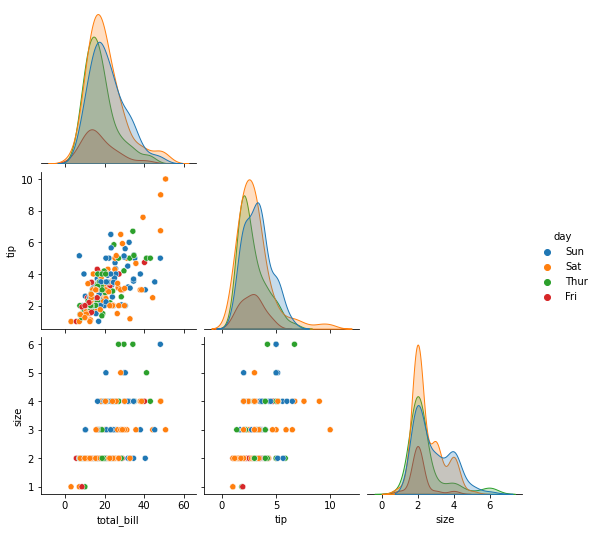

In [177]:
sns.pairplot(df, hue = "day", corner = True)

### unabhängige Variable - day

In [137]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [138]:
day_names = df["day"].unique()
day_counts = np.asarray(df["day"].value_counts())

[Text(0.5, 1.0, 'Häufigkeit Wochentage')]

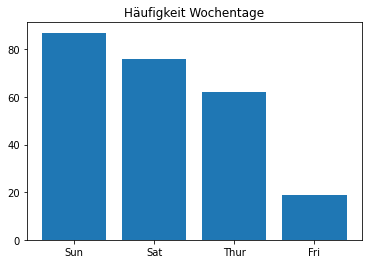

In [139]:
fig, ax = plt.subplots()
ax.bar(day_names, day_counts)
ax.set(title = "Häufigkeit Wochentage")

### abhängige Variable - total bill

In [172]:
df["total_bill"].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

Text(0.5, 1.0, 'Histogramm Gesamtsumme')

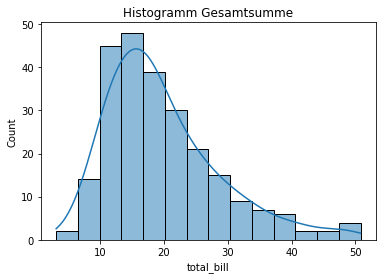

In [141]:
sns.histplot(df["total_bill"], kde = True,).set_title("Histogramm Gesamtsumme")

In [142]:
pg.normality(df["total_bill"], method = "shapiro")

,W,pval,normal
total_bill,0.919719,3.324543e-10,False


### total_bill nach Wochentag

In [143]:
grouped = df.groupby(by = df["day"])

In [170]:
grouped["total_bill"].describe().transpose()

day,Fri,Sat,Sun,Thur
count,19.000000,87.000000,76.000000,62.000000
mean,17.151579,20.441379,21.410000,17.682742
std,8.302660,9.480419,8.832122,7.886170
min,5.750000,3.070000,7.250000,7.510000
25%,12.095000,13.905000,14.987500,12.442500
50%,15.380000,18.240000,19.630000,16.200000
75%,21.750000,24.740000,25.597500,20.155000
max,40.170000,50.810000,48.170000,43.110000


Text(0.5, 1.0, 'Histogramm Trinkgeld Sonntag')

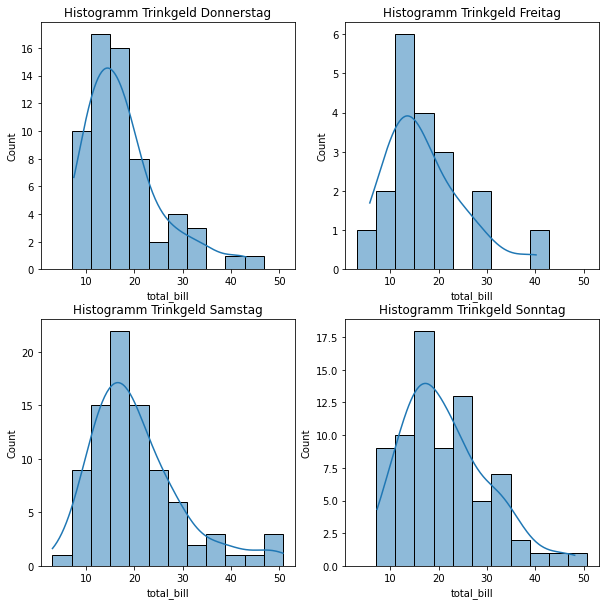

In [145]:
minrange = df["total_bill"].min()
maxrange = df["total_bill"].max()

fig, axs = plt.subplots(2,2,figsize=(10,10))
sns.histplot(df[df["day"]== "Thur"]["total_bill"], binrange = (minrange,maxrange), kde = True,
             bins = 12, ax=axs[0,0]).set_title("Histogramm Trinkgeld Donnerstag")
sns.histplot(df[df["day"]== "Fri"]["total_bill"], binrange = (minrange,maxrange), kde = True,
             bins = 12, ax=axs[0,1]).set_title("Histogramm Trinkgeld Freitag")
sns.histplot(df[df["day"]== "Sat"]["total_bill"], binrange = (minrange,maxrange), kde = True,
             bins = 12, ax=axs[1,0]).set_title("Histogramm Trinkgeld Samstag")
sns.histplot(df[df["day"]== "Sun"]["total_bill"], binrange = (minrange,maxrange), kde = True,
             bins = 12, ax=axs[1,1]).set_title("Histogramm Trinkgeld Sonntag") 

In [146]:
pg.normality(data = df, dv="total_bill", group="day", method = "shapiro")

,W,pval,normal
Sun,0.947939,0.003566,False
Sat,0.903476,0.000008,False
Thur,0.884489,0.000029,False
Fri,0.895793,0.040856,False


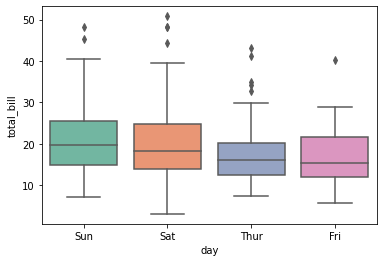

In [147]:
ax = sns.boxplot(x="day", y="total_bill",
                    data=df, palette="Set2")

Der Boxplot zeigt Ausreisser. Die Verteilungen scheinen sich nicht sehr stark voneinander zu unterscheiden, da sich die Interquartilsdistanzen Q1-Q3 start überschneiden. Median-Unterschiede liegen geringfügig vor zwischen Donnerstag / Freitag auf der einen und Samstag / Sonntag auf der anderen Seite.

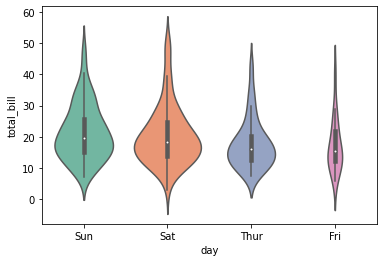

In [148]:
ax = sns.violinplot(x="day", y="total_bill",
                    data=df, palette="Set2", split=False,
                    scale="count")

Der Violinplot zeigt die Dichte der Verteilung der total_bill nach Wochentagen. Zusätzlich zu den Boxplots wird hier die Rechtsschiefe, die typisch für monetäre Variablen ist, gut ersichtlich. Ebenso die unterschiedlichen Häufigkeiten der Zahlungsvorgänge, vor allem der Freitag kommt in den Daten deutlich seltener vor.

QQplots scipy vs pingouin

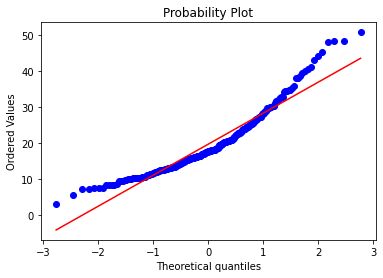

In [149]:
import pylab 
import scipy.stats as stats
stats.probplot(df["total_bill"], dist="norm", plot=pylab)
pylab.show()

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

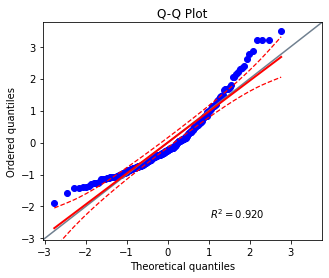

In [176]:
pg.qqplot(df["total_bill"], dist="norm")

Sowohl niedrige Werte als auch hohe Werte von total_bill treten laut QQ-Plot häufiger auf als in der Normalverteilung zu erwarten wäre.

### Zusammenfassung - Liegt Normalverteilung vor?

Die Verteilung der Variable total_bill ist rechtsschief sowohl in der Gesamtheit als auch nach Wochentagen unterteilt. Laut dem Shapiro-Wilk-Test auf Normalverteilung ist total_bill insgesamt nicht normalverteilt (W = 0.919719, p = 3.324543e-10). Dies gilt auch für die Rechnungssummen nach Wochentagen unterteilt.<br>
Sun 	0.947939 	0.003566 	False<br>
Sat 	0.903476 	0.000008 	False<br>
Thur 	0.884489 	0.000029 	False<br>
Fri 	0.895793 	0.040856 	False<br>
Für den Freitag, der mit 19 eine deutlich geringere Fallzahl aufweist, ist der kritische Wert zur Verwerfung der H0 (es liegt keine Normalverteilung vor) immerhin knapp erreicht. Hier liegt jedoch für das weitere Vorgehen das Problem, dass die Verletzung der Normalität bei einer kleinen Gruppengröße wie am Freitag (n=19 < 25) gravierender ist als für die anderen Tage (Donnerstag n = 62, Samstag n = 87, Sonntag n = 76). Von entscheidender Wichtigkeit für die Varianzanalyse ist das Vorliegen von Varianzhomogenität, welche im Folgenden untersucht werden soll.


## Prüfung der Varianzhomogenität (Levene-Test)


Levene-Test mit scipy

In [150]:
from scipy.stats import levene

In [151]:
levene(df[df["day"]== "Thur"]["total_bill"], df[df["day"]== "Fri"]["total_bill"], 
       df[df["day"]== "Sat"]["total_bill"], df[df["day"]== "Sun"]["total_bill"], center = "mean")

LeveneResult(statistic=0.6921000696452873, pvalue=0.557665985493351)

Levene-Test mit pingouin

In [152]:
pg.homoscedasticity(data = df, dv = "total_bill", group = "day", method = "levene", alpha = 0.05)

,W,pval,equal_var
levene,0.665358,0.574079,True


Beim Levene-Test ist zu beachten, dass Pingouion immer den Median als Center verwendet, in der scipy-Funktion kann das center als Parameter eingestellt werden. <br>
Der Levene-Test ergibt mit W=1.70 und p=0.166 > 0.05, dass die Nullhypothese der Varianzhomogenität (es läge Varianzheterogenität vor) verworfen werden kann. Wir können des Weiteren von Varianzhomogentät in total_bill zwischen den Wochentagen ausgehen und können die Anova ohne Welch-Korrektur berechnen.

## Ergebnisse der einfaktoriellen Varianzanalyse ohne Messwiederholung


Deskriptive Analyse

In [169]:
grouped["total_bill"].describe().transpose()

day,Fri,Sat,Sun,Thur
count,19.000000,87.000000,76.000000,62.000000
mean,17.151579,20.441379,21.410000,17.682742
std,8.302660,9.480419,8.832122,7.886170
min,5.750000,3.070000,7.250000,7.510000
25%,12.095000,13.905000,14.987500,12.442500
50%,15.380000,18.240000,19.630000,16.200000
75%,21.750000,24.740000,25.597500,20.155000
max,40.170000,50.810000,48.170000,43.110000


Die Gruppenmittelwerte weisen eine Spanne von 2.533 zwischen 19.22 (Donnerstags)und 21.75 (Sonntags) auf. Die Mediane hingegen liegen zwischen 17.165 und 18.240 sehr nah beieinander und niedriger als die Mittelwerte. Dies deutet darauf hin dass total_bill von Ausreissern nach oben gekennzeichnet ist und diese je nach Wochentag auch unterschiedlich stark ausfallen.

Bei Mittelwerten von 19.221, 21.753, 20.127, 19.364 (Do Fr Sa So), Standardabweichung von 8.654, 10.693, 9.821 und 7.499 und Fallzahlen von 62, 19, 87 und 76 könnte es für die Anova schwierig werden, signifikante Gruppenunterschiede festzustellen.

In [154]:
from scipy.stats import f_oneway

In [155]:
f_oneway(df[df["day"]== "Thur"]["total_bill"], df[df["day"]== "Fri"]["total_bill"], 
       df[df["day"]== "Sat"]["total_bill"], df[df["day"]== "Sun"]["total_bill"])

F_onewayResult(statistic=2.7674794432863363, pvalue=0.04245383328952047)

In [156]:
total_bill_aov = df.anova(dv='total_bill', between='day', detailed=True, effsize='np2')
total_bill_aov

,Source,SS,DF,MS,F,p-unc,np2
0,day,643.941362,3,214.647121,2.767479,0.042454,0.033437
1,Within,18614.522721,240,77.560511,NaN,NaN,NaN


Das Gesamtmodel ist bei F(3, 240) = 2.767 , p = 0.0424 auf dem 5%-Niveau signifikant.
Ob sich einzelne Tage signifikant unterscheiden ist anhand dieses Tests über alle Gruppen hinweg nocht nicht bestimmen. Dies soll im Folgenden mit Post-hoc Tests ermittelt werden.

Die Durchführung einer Welch-Korrektur in der Anova ist zwar nicht nötig da homogene Varianzen zw. Wochentagen vorlagen, aber zur Demonstration:

In [157]:
pg.welch_anova(data = df, dv='total_bill', between='day')

,Source,ddof1,ddof2,F,p-unc,np2
0,day,3,75.305338,3.011323,0.035306,0.033437


Aufgrund der Ergebnisse der Varianzanalyse kann bereits festgehalten werden, dass die H0 für den Gesamteffekt verworfen werden kann.

## Post-hoc-Tests


Posthoc in Pingouin: kein pooled standard error zw. Gruppen oder Interaktionen wie in JASP.
Die Funktion pairwise_ttests steht wie in R mit einigen p adjusttment methods zur Verfügung. Des weiteren gibt es die Funktionen pairwise_tukey und pairwise_gameshowell

In [158]:
pg.pairwise_ttests(data=df, dv='total_bill', between='day', padjust = "bonf", correction = 'auto', 
                   return_desc = True, effsize = "eta-square").round(3) 

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,eta-square
0,day,Sun,Sat,21.410,8.832,20.441,9.480,False,True,0.675,160.318,two-sided,0.501,1.000,bonf,0.209,0.003
1,day,Sun,Thur,21.410,8.832,17.683,7.886,False,True,2.616,134.860,two-sided,0.010,0.059,bonf,3.984,0.047
2,day,Sun,Fri,21.410,8.832,17.152,8.303,False,True,1.974,29.067,two-sided,0.058,0.348,bonf,1.327,0.056
3,day,Sat,Thur,20.441,9.480,17.683,7.886,False,True,1.933,143.436,two-sided,0.055,0.331,bonf,0.979,0.024
4,day,Sat,Fri,20.441,9.480,17.152,8.303,False,True,1.524,29.214,two-sided,0.138,0.830,bonf,0.685,0.030
5,day,Thur,Fri,17.683,7.886,17.152,8.303,False,True,0.247,28.682,two-sided,0.807,1.000,bonf,0.273,0.001


In [159]:
pg.pairwise_tukey(data=df, dv='total_bill', between='day', 
                   effsize = "eta-square").round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,eta-square
0,Fri,Sat,17.152,20.441,-3.290,2.230,-1.475,0.454,0.034
1,Fri,Sun,17.152,21.410,-4.258,2.259,-1.885,0.235,0.055
2,Fri,Thur,17.152,17.683,-0.531,2.309,-0.230,0.900,0.001
3,Sat,Sun,20.441,21.410,-0.969,1.383,-0.700,0.896,0.003
4,Sat,Thur,20.441,17.683,2.759,1.464,1.885,0.235,0.024
5,Sun,Thur,21.410,17.683,3.727,1.507,2.473,0.065,0.043


Pairwise t-tests mit Bonferroni-Korrektur und nach Tukey Honest Squared Differences ergeben beide, dass es keine signifikanten Paardifferenzen gibt. Die Mittelwertsunterschiede von total_bill zwischen einzelnen Wochentagen unterscheiden sich auf dem 5%-Niveau in keinem Fall. Die konservativere Bonferroni-Korrektur der p-Werte wurde als robute Methode bei unbalanced design präferiert (n zwischen 19 und 87). Da keine Paardifferenz signifikant ist, kann auch keine Generalisierung eines Effekts einer bestimmten Gruppe (eines Tages über alle anderen) getätigt werden.

Beispielhaft soll anhand des folgenden Paardifferenztests mit "Gruppengröße" / size gezeigt werden, dass signifikanter Unterschied auf dem 5%-Niveau nach Bonferroni-Korrektur immerhin zwischen Freitag und Sonntag zu bestehen scheint.  

In [160]:
pg.pairwise_ttests(data=df, dv='size', between='day', padjust = "bonf", correction = 'auto', 
                   return_desc = True, effsize = "eta-square").round(3) 

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,eta-square
0,day,Sun,Sat,2.842,1.007,2.517,0.819,False,True,2.238,144.609,two-sided,0.027,0.160,bonf,1.68,0.031
1,day,Sun,Thur,2.842,1.007,2.452,1.066,False,True,2.194,127.284,two-sided,0.030,0.180,bonf,1.613,0.034
2,day,Sun,Fri,2.842,1.007,2.105,0.567,False,True,4.234,50.110,two-sided,0.000,0.001,bonf,367.252,0.134
3,day,Sat,Thur,2.517,0.819,2.452,1.066,False,True,0.407,109.390,two-sided,0.685,1.000,bonf,0.193,0.001
4,day,Sat,Fri,2.517,0.819,2.105,0.567,False,True,2.624,36.557,two-sided,0.013,0.076,bonf,4.582,0.065
5,day,Thur,Fri,2.452,1.066,2.105,0.567,False,True,1.844,58.028,two-sided,0.070,0.421,bonf,1.09,0.031


## Profildiagramm


In [161]:
sta = grouped["total_bill"].agg([np.mean, np.std])
sta

,mean,std
day,,
Fri,17.151579,8.302660
Sat,20.441379,9.480419
Sun,21.410000,8.832122
Thur,17.682742,7.886170


<AxesSubplot:title={'center':'Mean total bill by day with standard deviation'}, ylabel='day'>

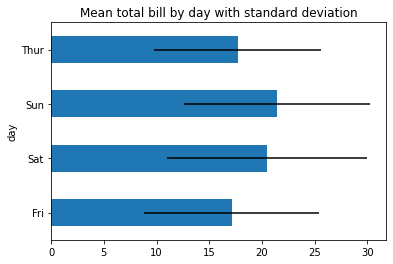

In [162]:
sta.plot(kind = "barh", y = "mean", legend = False, title = "Mean total bill by day with standard deviation", xerr = "std")

<ErrorbarContainer object of 3 artists>

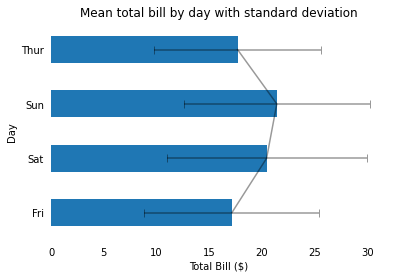

In [163]:
ax = sta.plot(kind = "barh", y = "mean", 
              legend = False, 
              title = "Mean total bill by day with standard deviation") 
ax.set_xlabel("Total Bill ($)")# Y
ax.set_ylabel("Day")
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(bottom = False, left = False)
ax.errorbar(sta["mean"], sta.index, xerr = sta["std"], 
            linewidth = 1.5, color = "black", alpha = 0.4, capsize = 4)

## Berechnung der Effektstärke


Das partielle Eta-Quadrat (partielles η2) ist ein Mass für die Effektgrösse: Es setzt die Variation, die durch einen Faktor erklärt wird, in Bezug mit jener Variation, die nicht durch andere Faktoren im Modell erklärt wird. Das heisst, es wird ausschliesslich jene Variation betrachtet, welche nicht durch die anderen Faktoren im Modell erklärt wird. Das partielle Eta-Quadrat zeigt, welchen Anteil davon ein Faktor erklärt. Im Falle der einfaktoriellen Varianzanalyse ist das partielle Eta-Quadrat ist jener Anteil der korrigierten Gesamtvariation, der durch das Modell erklärt wird.

$$\eta^2 =\frac{QS_{Zwischen}}{QS_{total}}$$
<br>
$$\eta^2_{par.} =\frac{QS_{Zwischen}}{QS_{zwischen}+QS_{innerhalb}}$$

$$\begin{align}
\text{Schwacher Effekt: } 0.10 &< ||f|| < 0.25             \\
\text{Schwacher bis mittlerer Effekt: } 0.25 &= ||f||      \\
\text{Mittlerer Effekt: } 0.25 &< ||f|| < 0.40             \\
\text{Mittlerer bis starker Effekt: }0.40 &= ||f||         \\
\text{Starker Effekt: } 0.40 &< ||f||        
\end{align}$$

In [164]:
eta = total_bill_aov["np2"][0]
print(eta)
eff = np.sqrt(eta/(1-eta))
print(eff)
print(f"Das partielle Eta für total bill liegt bei {eta.round(3)}, und somit beträgt die Effektgröße nach Cohen(1988) {eff.round(3)}.\nDies entspricht einem schwachen Effekt.")

0.033436797422140556
0.1859932607410262
Das partielle Eta für total bill liegt bei 0.033, und somit beträgt die Effektgröße nach Cohen(1988) 0.186.
Dies entspricht einem schwachen Effekt.


Im vorliegenden Beispiel beträgt das partielle Eta-Quadrat .0334. Das heisst, es wird 3.34% der Variation in total-bill durch day aufgeklärt.

## Aussage (Anova - einfaktoriellen Varianzanalyse ohne Messwiederholung)

Der Wochentag hat laut Anova einen signifikanten Einfluss auf die Rechnungshöhe (F(3, 240) = 2.767 , p = 0.0424) auf dem 5% Signifikanzniveau. 3.34% der Streuung der Rechnungssummen-Werte um den Gesamtmittelwert kann durch die Wochentage erklärt werden. Demnach läge die Effektstärke nach Cohen (1988) bei f = 0.186, was einem schwachen Effekt gleich käme.

Allerdings kommt der Post-hoc-Test mit Bonferri-Korrektur zu dem Ergebnis, dass sich keine generalisierbaren Gruppen aus den Wochentagen bilden lassen können (alle p > .05). Donnerstag (M=17.68, SD=7.89, N=62), Freitag (M=17.15, SD=8.30, N=19), Samstag (M=20.44, SD=9.48, N=87) und Sonntag (M=21.41, SD=8.83, N=76) lassen sich in Bonferroni-korrigierten Paardifferenztests nicht signifikant voneinander unterscheiden.

Obwohl für den Gesamteffekt die Anova sifnifikant war, wird H0 beibehalten und H1 verworfen, da keiner der Paardifferenztests signifikant war. Anzumerken wäre noch, dass die fehlende Normalverteilung in der abhängigen Variablen total_bill insbesondere durch die niedrige Gruppen-Fallzahl am Freitag mit n=19 zu einer Verzerrung des Ergebnisses führen kann, weshalb das Ergebnis mit Vorsicht interpretiert werden sollte und gegebenenfalls weitere Analysen mit anderer Datenvorverarbeitung durchgeführt werden sollten.